# APL Custom Artifact 01: Pin Location Errors

Data provided by John Slotwinski on 3/25/2016 ("3D position check.pdf").


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import plot_xy_err_2d, cart2polar


__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

In [11]:
def load_data(fn):
    """Loads data set from CSV file.
       fn : The .csv file to load.  Format is assumed to be:
            xNominal, xMeasured, yNominal, yMeasured, dNominal, dMeasured, zNominal, zMeasured

            where x, y, d, z are pin x-position, y-position, diameter and height.
            
    Note this data was measured in inches, so we convert to mm here.
    We continue to employ the convention:
         delta_x := x_nominal - X_measured
    """
    X = []  # nominal pin locations
    Xm = [] # measured pin locations
    D = []  # pin location errors (deltas)
    mmPerInch = 25.4

    cast = lambda row: [row[0].strip(),] + [float(x) for x in row[1:]]

    with open(fn, 'rU') as f:
        reader = csv.reader(f, delimiter=',')
        for rowIdx, row in enumerate(reader):
            if rowIdx == 0: continue # skip header

            pinId, xNom, xMeas, yNom, yMeas, dNom, dMeas, zNom, zMeas = cast(row)
            X.append((xNom, yNom))
            Xm.append((xMeas, yMeas))
            D.append((xNom - xMeas, yNom - yMeas))

    return mmPerInch * np.array(X), mmPerInch * np.array(Xm), mmPerInch * np.array(D)


def plot_pins(Xn, Xm, units='(mm)'):
    plt.figure()
    plt.scatter(Xn[:,0], Xn[:,1], color='magenta')
    plt.scatter(Xm[:,0], Xm[:,1], color='blue')
    plt.legend(['nominal', 'measured'])
    plt.plot([-52, 52], [0, 0], 'k-')
    plt.plot([0, 0], [-52, 52], 'k-')
    
    plt.xlabel('x location ' + units)
    plt.ylabel('y location ' + units)


In [12]:
Xn, Xm, D = load_data('/Users/pekalmj1/Documents/bb/gpam/data/APL01_M290_Maraging_steel/APL01_pin_features.csv')
assert(Xn.shape[0] == 50)  # there should be 50 pins
#print np.concatenate((Xn,D), axis=1)

rN, thetaN = cart2polar(Xn[:,0], Xn[:,1])  # nominal locations in polar coordinates

## APL01, Trial 1

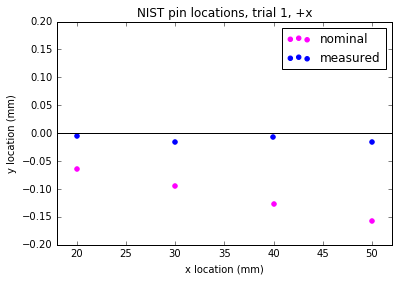

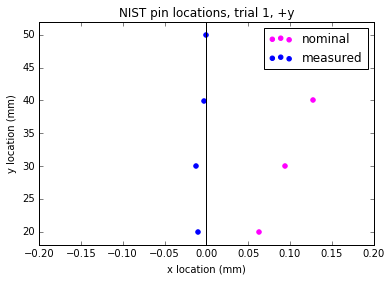

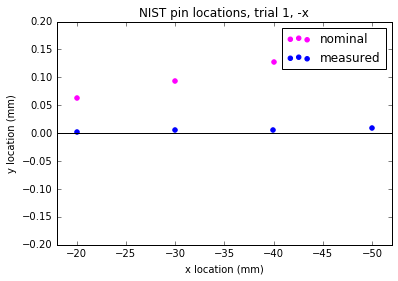

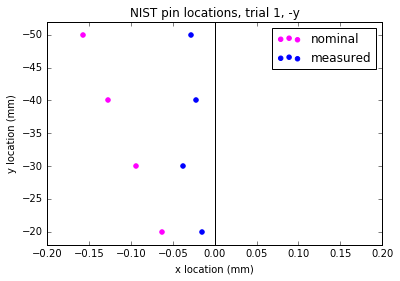

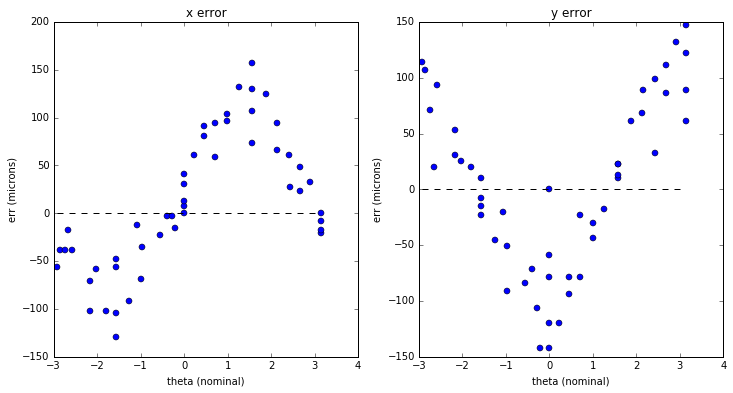

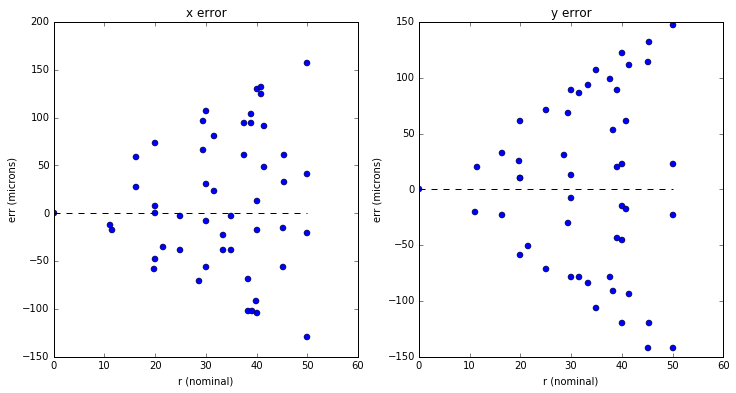

In [14]:
plot_pins(Xn, Xm)
plt.title('NIST pin locations, trial 1, +x')
plt.xlim([18, 52]);  plt.ylim([-.2, .2])

plot_pins(Xn, Xm)
plt.title('NIST pin locations, trial 1, +y')
plt.xlim([-.2, .2]);  plt.ylim([18, 52])

plot_pins(Xn, Xm)
plt.title('NIST pin locations, trial 1, -x')
plt.xlim([-18, -52]);  plt.ylim([-.2, .2])

plot_pins(Xn, Xm)
plt.title('NIST pin locations, trial 1, -y')
plt.xlim([-.2, .2]);  plt.ylim([-18, -52])

plot_xy_err_2d(thetaN, 1e3*D[:,0], 1e3*D[:,1], xLabel='theta (nominal)', yLabel='err (microns)')
plot_xy_err_2d(rN, 1e3*D[:,0], 1e3*D[:,1], xLabel='r (nominal)', yLabel='err (microns)')